# Etude du réseau T2C de Clermont-Ferrand

### chargement des librairies


In [1]:
import pandas 
import warnings; warnings.filterwarnings("ignore")
from expreseau_gtfs.feed import gtfs_feed

### définition d'un objet *gtfs_feed()*

In [2]:
fic = r"C:\Users\Lucas\Documents\DONNEES\GTFS\t2c\gtfs-t2c_plus_scolaire.zip"
date = '20240305'
ph = [7,9]

In [3]:
Feed = gtfs_feed(gtfs_path=fic,
                date=date,
                plage_horaire=ph)

### horaires de passages par arrêt et par ligne :

In [4]:
Feed.table_horaire()

,route_id,route_short_name,trip_id,direction_id,service_id,shape_id,stop_id,stop_sequence,arrival_time,departure_time,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,11821953316814895,A,4503749951496996,1,9,4503749951498966,3377704015496260,1,32400.0,32400.0,NaN,0,1,NaN
1,11821953316814895,A,4503749951496994,1,9,4503749951498966,3377704015495697,6,25200.0,25200.0,NaN,0,0,NaN
2,11821953316814895,A,4503749951496994,1,9,4503749951498966,3377704015495453,7,25260.0,25260.0,NaN,0,0,NaN
3,11821953316814895,A,4503749951496994,1,9,4503749951498966,3377704015496269,8,25380.0,25380.0,NaN,0,0,NaN
4,11821953316814895,A,4503749951496994,1,9,4503749951498966,3377704015495817,9,25440.0,25440.0,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,11822086460801039,63,4503749951496644,1,66,4503749951496644,3377837159481652,9,27600.0,27600.0,NaN,0,0,NaN
10439,11822086460801039,63,4503749951496644,1,66,4503749951496644,3377837159481686,10,27720.0,27720.0,NaN,0,0,NaN
10440,11822086460801039,63,4503749951496644,1,66,4503749951496644,3377837159481690,11,27900.0,27900.0,NaN,0,0,NaN
10441,11822086460801039,63,4503749951496644,1,66,4503749951496644,3377837159481671,12,28080.0,28080.0,NaN,0,0,NaN


### Evolution journalière de l'offre

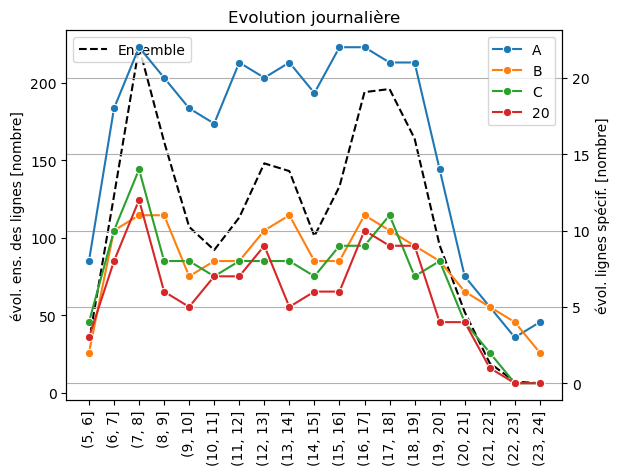

In [5]:
Feed.plot_evol_journaliere(liste_ligne_a_tracer=['A', 'B', 'C', "20"])

### etude de la fréquence par segments de ligne

In [6]:
from expreseau_gtfs.performances import performances

In [7]:
gperf = performances(Feed=Feed)

In [8]:
frq_par_segment = gperf.frequence_par_segment()

In [9]:
lignes_speciales = ['60', '62', '63', '70', '65', '66', '68', '69', '84', '71',
 '73', '75', '76', '77', '78', '85', '79', '83', '362',  '42', 'scolaire',  '80', '82', '61', "37"]
frq_par_segment = frq_par_segment[~frq_par_segment.route_short_name.isin(lignes_speciales)]

In [10]:
frq_par_segment.sort_values(by="nbtrips", ascending=True)\
.explore(column = 'nbtrips',
         style_kwds={"style_function":lambda x: {"weight":x["properties"]['nbtrips']/3},
                    "opacity":0.6})

### étude de la fréquence par ligne

In [11]:
freq_par_ligne = gperf.frequence_par_ligne()
freq_par_ligne.sort_values(by="mean_headway")

,route_short_name,direction_id,nbtrips,mean_headway
26,A,0.0,24,5.000000
70,A,1.0,21,5.714286
3,20,0.0,11,10.909091
39,3,1.0,11,10.909091
27,B,0.0,11,10.909091
...,...,...,...,...
55,68,1.0,1,120.000000
53,65,1.0,1,120.000000
51,62,1.0,1,120.000000
66,80,1.0,1,120.000000


#### cartographie

In [21]:
shp_lignes = gperf.traces_des_lignes().set_crs("epsg:4326")

shp_lignes = shp_lignes.merge(freq_par_ligne, on = 'route_short_name').drop_duplicates()
shp_lignes = shp_lignes[~shp_lignes.route_short_name.isin(lignes_speciales)]



shp_lignes.explore(column = "mean_headway", cmap = 'turbo_r', scheme = "quantiles")